# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the libraries you will be using for analysis

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [41]:
# Try loading one file

# df = pd.read_parquet('2023-1.parquet')
# df.info()

df = pd.read_parquet("/Users/sambitpani/Documents/Study/upgrad-AI&ML/Modules/M7 EDA Assignment/Starter Notebook - EDA NYC Taxi/trip_records/2023-12.parquet")
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 3333925 entries, 0 to 3376566
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee            floa

In [24]:
## my cell
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         14.30                   2.5         0.00  
1                    1.0         16.90                   2.5         0.00  
2                    1.0         34.90                   2.5         0.00  
3                    1.0         20.85                   0.0         1.25  
4                    1.0         19.68                   2.5         0.00

In [36]:
## my cell
#df['tpep_pickup_datetime'].year
#pd.to_datetime(df['tpep_pickup_datetime']).dt.day
date = pd.to_datetime(file_df['tpep_pickup_datetime'])
date.dt.year

0          2023
1          2023
2          2023
3          2023
4          2023
           ... 
3307229    2023
3307230    2023
3307231    2023
3307232    2023
3307233    2023
Name: tpep_pickup_datetime, Length: 3275796, dtype: int32

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [42]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/Users/sambitpani/Documents/Study/upgrad-AI&ML/Modules/M7 EDA Assignment/Starter Notebook - EDA NYC Taxi/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        file_df = pd.read_parquet(file_path)
        print(file_name)
        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()
        pickup_datetime = pd.to_datetime(file_df['tpep_pickup_datetime'])
        # Loop through dates and then loop through every hour of each date
        for date in range(1, 32):
            sampled_hourly_data = pd.DataFrame()
            for hour in range(0, 24):
            # Iterate through each hour of the selected date
                hourly_df = file_df[(pickup_datetime.dt.day == date) & (pickup_datetime.dt.hour == hour)]
                # Sample 5% of the hourly data randomly
                sampled_hourly_data = hourly_df.sample(frac = 0.05, random_state = 42)
                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, sampled_hourly_data])

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data]) # we initialised this empty DF earlier
    except Exception as e:
        print(f"Error reading file {file_name}: {e}")
df.head()        

2023-12.parquet
2023-6.parquet
2023-7.parquet
2023-5.parquet
2023-11.parquet
2023-10.parquet
2023-4.parquet
2023-1.parquet
2023-8.parquet
2023-9.parquet
2023-2.parquet
2023-3.parquet


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1099         2  2023-12-01 00:13:39   2023-12-01 00:21:26              6.0   
1231         2  2023-12-01 00:04:20   2023-12-01 00:17:04              1.0   
2779         2  2023-12-01 00:56:00   2023-12-01 01:03:44              2.0   
1322         2  2023-12-01 00:17:02   2023-12-01 00:23:44              1.0   
3772         2  2023-12-01 00:02:30   2023-12-01 00:21:31              1.0   

      trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
1099           1.32         1.0                  N           158   
1231           2.07         1.0                  N           142   
2779           0.92         1.0                  N           186   
1322           0.75         1.0                  N           186   
3772           3.60         1.0                  N            79   

      DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
1099           246             1          9.3    1.0      0.5        2.86   
1231           164             2         13.5    1.0      0.5        0.00   
2779           170             1          8.6    1.0      0.5        0.00   
1322           230             1          7.9    1.0      0.5        2.58   
3772            50             1         21.2    1.0      0.5        5.24   

      tolls_amount  improvement_surcharge  total_amount  congestion_surcharge  \
1099           0.0                    1.0         17.16                   2.5   
1231           0.0                    1.0         18.50                   2.5   
2779           0.0                    1.0         13.60                   2.5   
1322           0.0                    1.0         15.48                   2.5   
3772           0.0                    1.0         31.44                   2.5   

      Airport_fee  airport_fee  
1099          0.0          NaN  
1231          0.0          NaN  
2779          0.0          NaN  
1322          0.0          NaN  
3772          0.0          NaN

In [43]:
# my cell
df.shape

(1896420, 20)

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [44]:
# Store the df in csv/parquet
# df.to_parquet('')
df.to_parquet('final_dataset.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [18]:
# Load the new data file

df_taxi = pd.read_parquet('trip_records/final_dataset.parquet')

In [9]:
df_taxi.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-12-01 00:13:39   2023-12-01 00:21:26              6.0   
1         2  2023-12-01 00:04:20   2023-12-01 00:17:04              1.0   
2         2  2023-12-01 00:56:00   2023-12-01 01:03:44              2.0   
3         2  2023-12-01 00:17:02   2023-12-01 00:23:44              1.0   
4         2  2023-12-01 00:02:30   2023-12-01 00:21:31              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           1.32         1.0           158           246             1   
1           2.07         1.0           142           164             2   
2           0.92         1.0           186           170             1   
3           0.75         1.0           186           230             1   
4           3.60         1.0            79            50             1   

   fare_amount  extra  tip_amount  tolls_amount  total_amount  \
0          9.3    1.0        2.86           0.0         17.16   
1         13.5    1.0        0.00           0.0         18.50   
2          8.6    1.0        0.00           0.0         13.60   
3          7.9    1.0        2.58           0.0         15.48   
4         21.2    1.0        5.24           0.0         31.44   

   congestion_surcharge  Airport_fee  
0                   2.5          0.0  
1                   2.5          0.0  
2                   2.5          0.0  
3                   2.5          0.0  
4                   2.5          0.0

In [10]:
df_taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896420 entries, 0 to 1896419
Data columns (total 16 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  tip_amount             float64       
 12  tolls_amount           float64       
 13  total_amount           float64       
 14  congestion_surcharge   float64       
 15  Airport_fee            float64       
dtypes: datetime64[us](2), float64(10), int64(4)
memory usage: 231.5 MB


#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [19]:
# Fix the index and drop any columns that are not needed
df_taxi.reset_index(inplace= True, drop= True)
df_taxi.drop(labels= "store_and_fwd_flag", axis = 1, inplace = True)  ## dropped store_and_fwd_flag column as most of the values are N
df_taxi.drop(labels= "improvement_surcharge", axis = 1, inplace = True)  
df_taxi.drop(labels= "mta_tax", axis = 1, inplace = True)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [20]:
# Combine the two airport fee columns
df_taxi.fillna({"airport_fee": 0}, inplace= True)
df_taxi.fillna({"Airport_fee": 0}, inplace= True)
df_taxi["Airport_fee"] = df_taxi["Airport_fee"] + df_taxi["airport_fee"]
df_taxi.drop(labels= "airport_fee", axis = 1, inplace = True)

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [21]:
# check where values of fare amount are negative
(df_taxi.iloc[:,9: ] < 0).sum()


fare_amount              0
extra                    3
tip_amount               0
tolls_amount             0
total_amount            80
congestion_surcharge    57
Airport_fee             15
dtype: int64

Did you notice something different in the `RatecodeID` column for above records?

In [22]:
# Analyse RatecodeID for the negative fare amounts
# There are no negative Fare Amount
print((df_taxi["RatecodeID"] < 0).sum())
print(df_taxi["RatecodeID"].value_counts()) ##  invalid id = 99 in the RatecodeID column
df_taxi["RatecodeID"].isnull().sum()


0
RatecodeID
1.0     1729347
2.0       71584
99.0      10477
5.0       10293
3.0        6123
4.0        3718
6.0           3
Name: count, dtype: int64


64875

In [23]:
# Find which columns have negative values

(df_taxi.iloc[:,3: ] < 0).sum()


passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    3
tip_amount               0
tolls_amount             0
total_amount            80
congestion_surcharge    57
Airport_fee             15
dtype: int64

In [24]:
# fix these negative values
# replaced with 0
df_taxi["extra"] = df_taxi["extra"].apply(lambda x : 0 if x < 0 else x)
df_taxi["total_amount"] = df_taxi["total_amount"].apply(lambda x : 0 if x < 0 else x)
df_taxi["congestion_surcharge"] = df_taxi["congestion_surcharge"].apply(lambda x : 0 if x < 0 else x)
df_taxi["Airport_fee"] = df_taxi["Airport_fee"].apply(lambda x : 0 if x < 0 else x)


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [25]:
# Find the proportion of missing values in each column

round(100*(df_taxi.isnull().sum()/len(df_taxi.index)), 2)

VendorID                 0.00
tpep_pickup_datetime     0.00
tpep_dropoff_datetime    0.00
passenger_count          3.42
trip_distance            0.00
RatecodeID               3.42
PULocationID             0.00
DOLocationID             0.00
payment_type             0.00
fare_amount              0.00
extra                    0.00
tip_amount               0.00
tolls_amount             0.00
total_amount             0.00
congestion_surcharge     3.42
Airport_fee              0.00
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [28]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
passenger_count_median = df_taxi["passenger_count"].median()
df_taxi["passenger_count"] = df_taxi["passenger_count"].apply(lambda x : passenger_count_median if np.isnan(x) else x) # choose median to replace missing value

Did you find zeroes in passenger_count? Handle these.

In [29]:
print((df_taxi["passenger_count"] <= 0).sum())
df_taxi = df_taxi[df_taxi["passenger_count"] != 0.0]  ## removed rows having 0 passenger count

29683


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [34]:
print(df_taxi["RatecodeID"].isnull().sum())
round(df_taxi["RatecodeID"].value_counts(normalize=True) * 100,2)

64875


RatecodeID
1.0     94.39
2.0      3.93
99.0     0.58
5.0      0.56
3.0      0.34
4.0      0.20
6.0      0.00
Name: proportion, dtype: float64

In [35]:
df_taxi["RatecodeID"] = df_taxi["RatecodeID"].apply(lambda x : 1.0 if np.isnan(x) else x)

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [38]:
# handle null values in congestion_surcharge
print(df_taxi["congestion_surcharge"].value_counts())
print(df_taxi["congestion_surcharge"].describe())
print(df_taxi["congestion_surcharge"].isnull().sum())
congestion_surcharge_median = df_taxi["congestion_surcharge"].median()
df_taxi["congestion_surcharge"] = df_taxi["congestion_surcharge"].apply(lambda x : congestion_surcharge_median if np.isnan(x) else x) ## replace null values with median values


congestion_surcharge
2.5    1663096
0.0     138765
0.5          1
Name: count, dtype: int64
count    1.801862e+06
mean     2.307469e+00
std      6.665278e-01
min      0.000000e+00
25%      2.500000e+00
50%      2.500000e+00
75%      2.500000e+00
max      2.500000e+00
Name: congestion_surcharge, dtype: float64
64875


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [40]:
# Handle any remaining missing values
round(100*(df_taxi.isnull().sum()/len(df_taxi.index)), 2)
df_taxi.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
tip_amount               0
tolls_amount             0
total_amount             0
congestion_surcharge     0
Airport_fee              0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

<Axes: ylabel='trip_distance'>

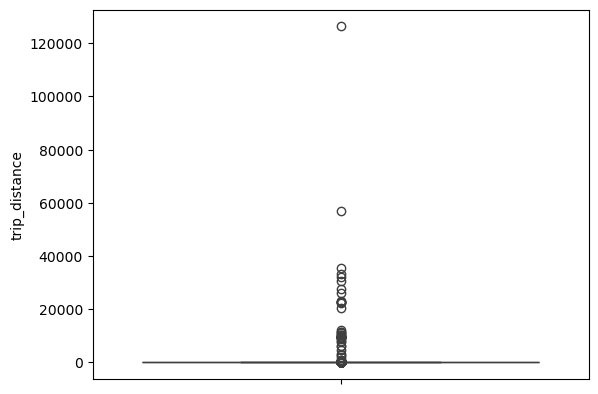

In [30]:
# # Describe the data and check if there are any potential outliers present
# # Check for potential out of place values in various columns
# raw_df.head()
#raw_df["VendorID"].value_counts()

# # Passenger count
#raw_df["passenger_count"].value_counts() ## less data > 6

# # Trip Distance
# # print(raw_df["trip_distance"].describe())
# # print(raw_df["trip_distance"].quantile(0.9999))
sns.boxplot(raw_df["trip_distance"])  ## 99.99 percentil is 57. lot of outliers
# # plt.show()


# #RatecodeID
# #raw_df["RatecodeID"].value_counts()  ## invalid value 99, only 3 records with value 6

# #PULocationID
# #raw_df["PULocationID"].isnull().sum()

# #DOLocationID
# #raw_df["DOLocationID"].isnull().sum()

# #payment_type
# #raw_df["payment_type"].value_counts()  ## invalid payment type 0

# #fare_amount
# # sns.boxplot(raw_df["fare_amount"])
# # plt.show()
# #(raw_df["fare_amount"] > raw_df["fare_amount"].quantile(0.99)).sum() ## 18627 outside 99 percentile

# #(raw_df["fare_amount"] == 0.0).sum()  ## 617 rides without fare amount


# #extra
# # raw_df["extra"].value_counts()
# # sns.boxplot(raw_df["extra"])
# #raw_df["extra"].quantile(0.99) # outliers above 7

# #mta_tax
# # raw_df["mta_tax"].value_counts()   # mostly 0.50


# #tip_amount
# # raw_df["tip_amount"].describe()
# # sns.boxplot(raw_df["tip_amount"])
# # raw_df["tip_amount"].quantile(0.99) # outliers above 100

# #tolls_amount
# # raw_df["tolls_amount"].describe()
# # raw_df["tolls_amount"].value_counts()
# # sns.boxplot(raw_df["tolls_amount"])
# # raw_df["tolls_amount"].quantile(0.99)  # lot of outliers 

# #improvment_surcharge
# # raw_df["improvement_surcharge"].describe()
# # sns.boxplot(raw_df["improvement_surcharge"])
# # raw_df["improvement_surcharge"].value_counts()  # mostly 1.0

# #total_amount
# # sns.boxplot(raw_df["total_amount"])
# # raw_df["total_amount"].describe()
# # raw_df["total_amount"].quantile(0.99)  # lot of outliers about 104

# #congestion_surcharge
# sns.boxplot(raw_df["congestion_surcharge"])
# raw_df["congestion_surcharge"].value_counts()   # mostly 2.5, 0.0, remove 0.5 (count =1 )

# #Airport_fee
#print(raw_df["Airport_fee"].value_counts())  # remove 1 outlier whose value is 1.00
#sns.boxplot(raw_df["Airport_fee"])


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

In [41]:
# Removed Entries where trip_distance is nearly 0 and fare_amount is more than 300
df_taxi = df_taxi[~((df_taxi["trip_distance"] < 1) & (df_taxi["fare_amount"] > 300))]

In [42]:
# Remove Entries where trip_dustance = 0, fare_amount = 0 and different pickip and dropoff zone
df_taxi = df_taxi[~((df_taxi["trip_distance"] == 0) & (df_taxi["fare_amount"] == 0) & (df_taxi["PULocationID"] != df_taxi["DOLocationID"]))]

In [43]:
# Remove entries where trip_distance is more than 250 miles
df_taxi = df_taxi[df_taxi["trip_distance"] < 250]

In [44]:
# Remove payment type =0
df_taxi = df_taxi[df_taxi["payment_type"] != 0]

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [45]:
# remove passenger_count > 6
df_taxi = df_taxi[df_taxi["passenger_count"]<= 6]

6.885 -2.435
(17954, 16)
20.27


<Axes: xlabel='trip_distance', ylabel='Density'>

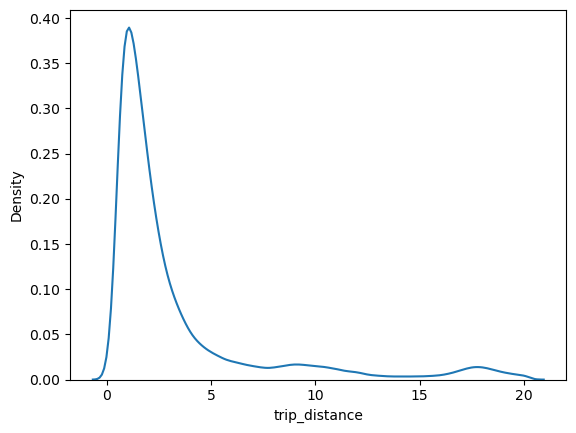

In [ ]:
# Continue with outlier handling

# Trip distance 

#sns.boxplot(raw_df["trip_distance"])
# print(raw_df["trip_distance"].describe())
iqr = df_taxi["trip_distance"].quantile(0.75) - df_taxi["trip_distance"].quantile(0.25)
upper_range = df_taxi["trip_distance"].quantile(0.75)  + (1.5 * iqr)
lower_range = df_taxi["trip_distance"].quantile(0.25) - (1.5 *iqr)
print(upper_range, lower_range)
print(df_taxi[df_taxi["trip_distance"] > 20.27].shape)
#sns.kdeplot(df_taxi[df_taxi["trip_distance"]< 20.27]["trip_distance"])
print(df_taxi["trip_distance"].quantile(0.99))
trip_distance_99 = df_taxi["trip_distance"].quantile(0.99)
# print((df_taxi["trip_distance"] > 20.27).sum())
# sns.scatterplot(df_taxi["trip_distance"])

# Removed data with trip_distance more than outlier 100 and trip-distance =0 but not a round a trip
df_taxi = df_taxi[(df_taxi["trip_distance"] <= trip_distance_99) & (df_taxi["trip_distance"] > 0)]

sns.kdeplot(df_taxi["trip_distance"])

In [50]:
# Removed Ratecodeid = 99
df_taxi = df_taxi[df_taxi["RatecodeID"] != 99]

In [ ]:
# Do any columns need standardising?
# Fare Amount

#Remove fare_amount > 400 and less than 1
#sns.boxplot(df_taxi["fare_amount"])
fare_amount_99 = df_taxi["fare_amount"].quantile(0.99)
#sns.kdeplot(df_taxi["fare_amount"])

df_taxi = df_taxi[(df_taxi["fare_amount"] <= fare_amount_99) & (df_taxi["fare_amount"] >= 1)]
#sns.kdeplot(df_taxi["fare_amount"])

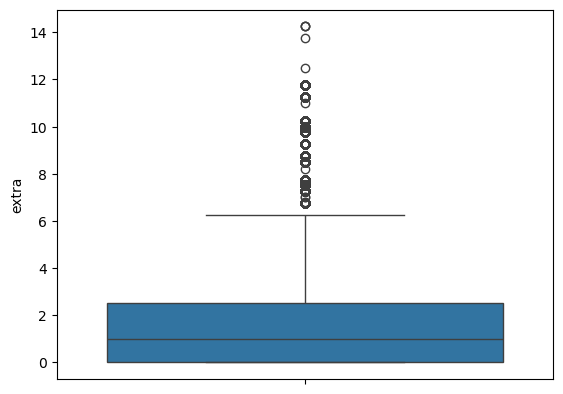

In [54]:
#Extra
#  Remove extra > 6
sns.boxplot(df_taxi["extra"])
#df_taxi["extra"].describe()
df_taxi = df_taxi[df_taxi["extra"] <= 6]


0


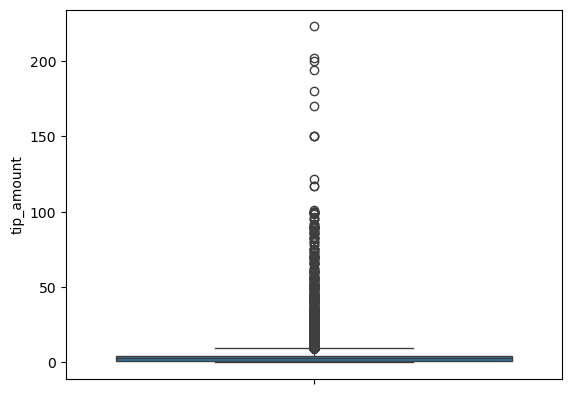

In [58]:
# Tip amount


#df_taxi["tip_amount"].describe()

print((df_taxi["tip_amount"]< 0).sum())

sns.boxplot(df_taxi["tip_amount"])

df_taxi = df_taxi[df_taxi["tip_amount"] <= 100]

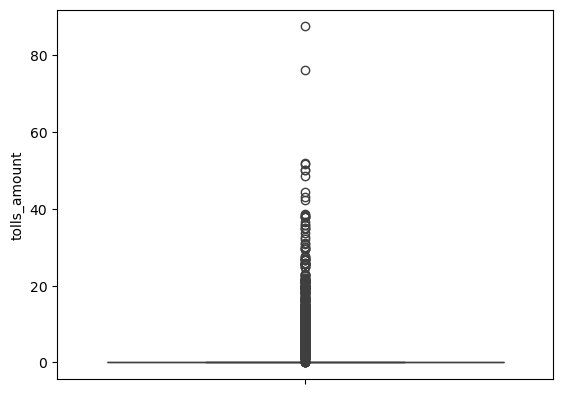

In [56]:
# Tolls amount
# 
#df_taxi["tolls_amount"].min()
#df_taxi["tolls_amount"].value_counts()
sns.boxplot(df_taxi["tolls_amount"])
df_taxi = df_taxi[df_taxi["tolls_amount"] <= 20]

In [65]:
# Total amount
# 


#sns.kdeplot(df_taxi["total_amount"])

#sns.boxplot(df_taxi["total_amount"])

df_taxi = df_taxi[df_taxi["total_amount"] <= df_taxi["total_amount"].quantile(0.99)]


congestion_surcharge
2.5    1601210
0.0      87885
0.5          1
Name: count, dtype: int64
Airport_fee
0.00    1590776
1.75      71611
1.25      26708
1.00          1
Name: count, dtype: int64


<Axes: ylabel='congestion_surcharge'>

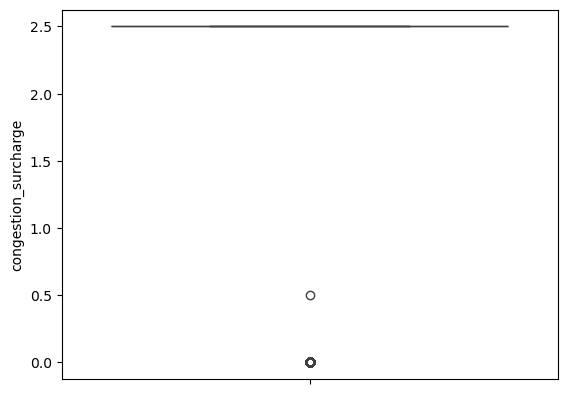

In [66]:
print(df_taxi["congestion_surcharge"].value_counts())
print(df_taxi["Airport_fee"].value_counts())
sns.boxplot(df_taxi["congestion_surcharge"])



In [67]:
df_taxi["pickup_month"] = df_taxi["tpep_pickup_datetime"].dt.month
df_taxi["pickup_weekday"] = df_taxi["tpep_pickup_datetime"].dt.strftime("%A")
df_taxi["pickup_day"] = df_taxi["tpep_pickup_datetime"].dt.day
df_taxi["pickup_hour"] = df_taxi["tpep_pickup_datetime"].dt.hour


In [68]:
df_taxi["trip_duration"]= (df_taxi["tpep_dropoff_datetime"] - df_taxi["tpep_pickup_datetime"]).apply(lambda x : round(x.total_seconds()/60, 2))

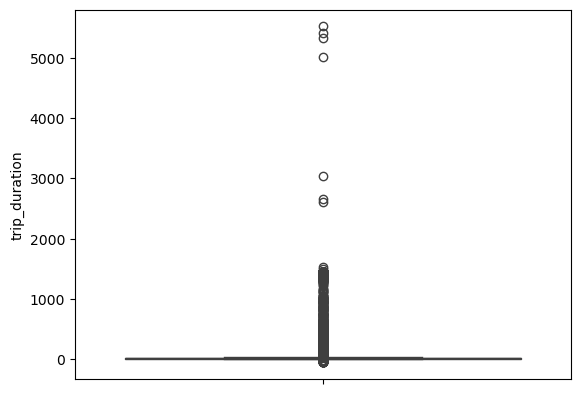

In [90]:
#Trip Duration

sns.boxplot(df_taxi["trip_duration"])
df_taxi = df_taxi[df_taxi["trip_duration"] >= 1]
trip_duraion_99 = df_taxi["trip_duration"].quantile(0.99)
df_taxi = df_taxi[df_taxi["trip_duration"] <= trip_duraion_99]

In [91]:
df_taxi.shape

(1667673, 21)

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [92]:
df_taxi.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'tip_amount',
 'tolls_amount',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee',
 'pickup_month',
 'pickup_weekday',
 'pickup_day',
 'pickup_hour',
 'trip_duration']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`: Numerical
* `tpep_dropoff_datetime`: Numerical
* `passenger_count`: Numerical
* `trip_distance`: Numerical
* `RatecodeID`: Categorical
* `PULocationID`: Categorical
* `DOLocationID`: Categorical
* `payment_type`: Categorical
* `pickup_hour`: Categorical
* `trip_duration`: Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount` : numerical
* `extra` : numerical
* `mta_tax` : numerical
* `tip_amount` : numerical
* `tolls_amount` : numerical
* `improvement_surcharge` : numerical
* `total_amount` : numerical
* `congestion_surcharge` : numerical
* `airport_fee` : numerical

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

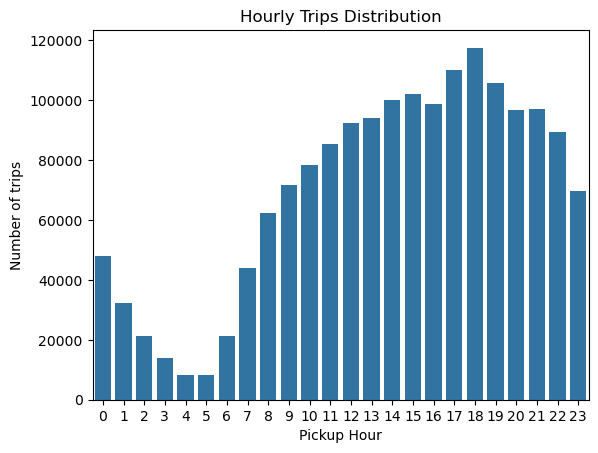

In [93]:
# Find and show the hourly trends in taxi pickups

ax = sns.countplot(df_taxi, x = "pickup_hour")
ax.set_xlabel("Pickup Hour")
ax.set_ylabel("Number of trips")
ax.set_title("Hourly Trips Distribution")
plt.show()

pickup_weekday
Thursday     260543
Wednesday    256110
Saturday     248216
Friday       245665
Tuesday      241691
Sunday       210371
Monday       205077
Name: count, dtype: int64


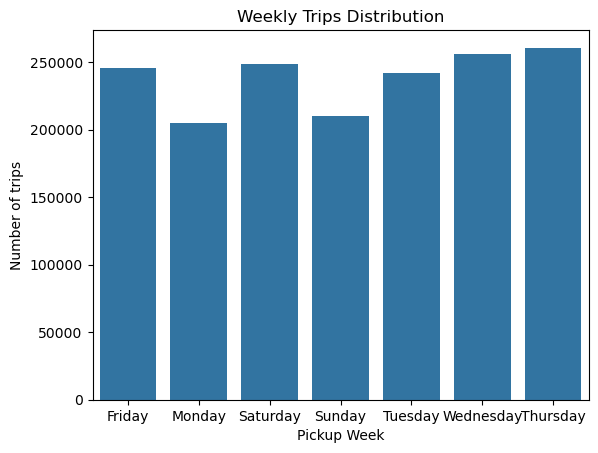

In [95]:
# Find and show the daily trends in taxi pickups (days of the week)
print(df_taxi["pickup_weekday"].value_counts())
ax = sns.countplot(df_taxi , x = "pickup_weekday")
ax.set_xlabel("Pickup Week")
ax.set_ylabel("Number of trips")
ax.set_title("Weekly Trips Distribution")
plt.show()

pickup_month
5     152948
10    151146
3     150256
11    144325
4     144249
6     144113
12    143628
1     137174
2     130158
7     126908
8     122193
9     120575
Name: count, dtype: int64


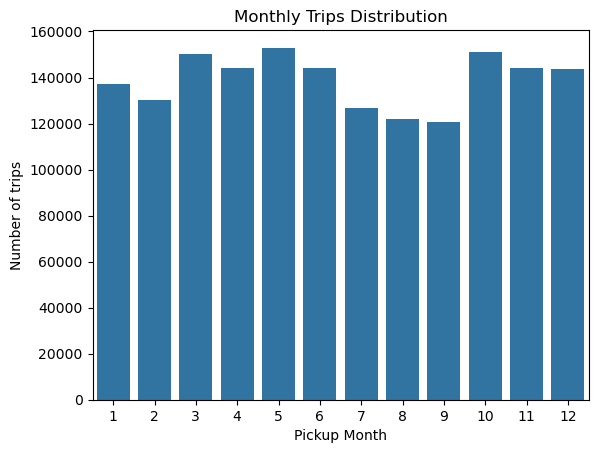

In [96]:
# Show the monthly trends in pickups
print(df_taxi["pickup_month"].value_counts())
ax = sns.countplot(df_taxi, x = "pickup_month")
ax.set_xlabel("Pickup Month")
ax.set_ylabel("Number of trips")
ax.set_title("Monthly Trips Distribution")
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [98]:
# Analyse the above parameters
print((df_taxi["fare_amount"] <= 0).sum())
print((df_taxi["total_amount"] <= 0).sum())
print((df_taxi["tip_amount"] <= 0).sum())
print((df_taxi["trip_distance"] <= 0).sum())



0
0
353316
0


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [99]:
# Create a df with non zero entries for the selected parameters.

df_taxi = df_taxi[~((df_taxi["fare_amount"] <= 0) | (df_taxi["total_amount"] <= 0) | (df_taxi["tip_amount"] <= 0))]

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

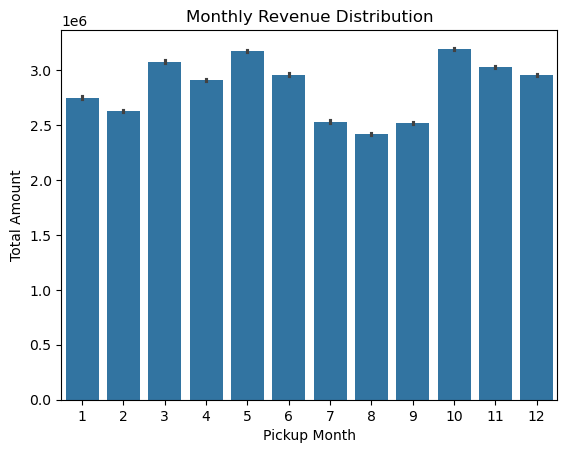

In [100]:
# Group data by month and analyse monthly revenue

ax = sns.barplot(df_taxi, x = "pickup_month", y= "total_amount", estimator= "sum")
ax.set_xlabel("Pickup Month")
ax.set_ylabel("Total Amount")
ax.set_title("Monthly Revenue Distribution")
plt.show()

In [ ]:
#pd.pivot_table(df_taxi, values="total_amount", index = "pickup_month", aggfunc= "sum")
df_taxi.groupby(by = "pickup_month")["total_amount"].agg("sum").sort_values(ascending= False)

pickup_month
10    3192432.07
5     3170579.21
3     3076763.20
11    3030371.18
6     2959406.31
12    2956612.91
4     2908437.69
1     2749736.34
2     2628660.45
7     2532083.12
9     2518544.00
8     2421844.69
Name: total_amount, dtype: float64

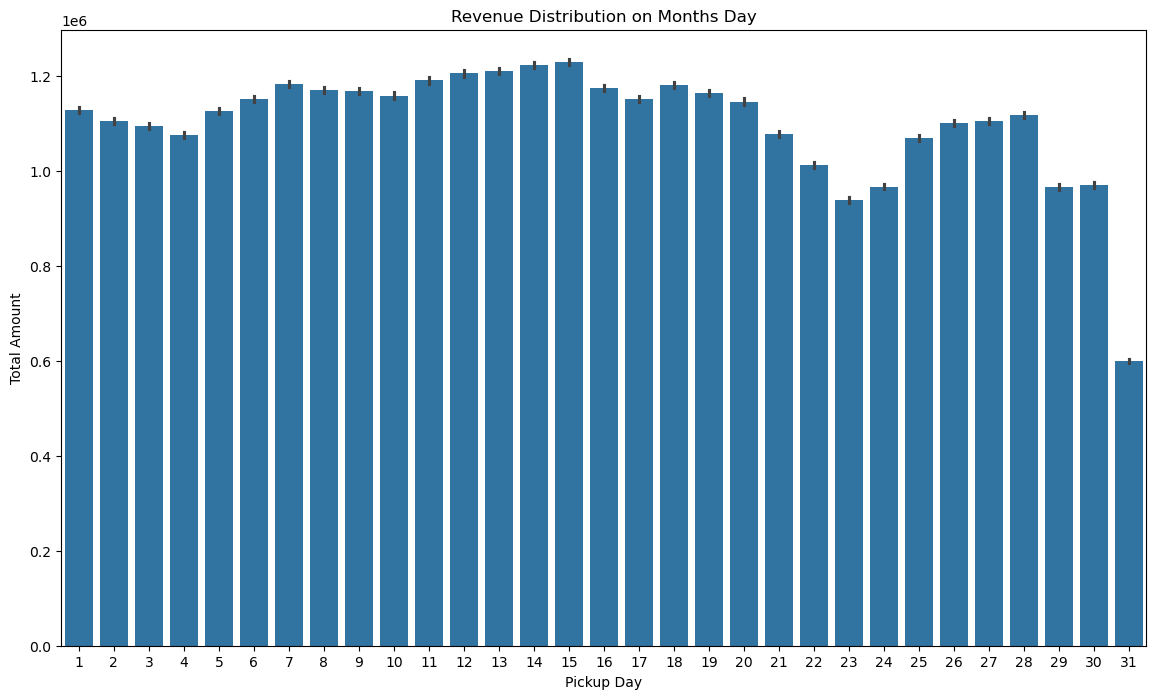

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.barplot(df_taxi, x = "pickup_day", y= "total_amount", estimator= "sum", ax=ax)
ax.set_xlabel("Pickup Day")
ax.set_ylabel("Total Amount")
ax.set_title("Revenue Distribution on Months Day")
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [107]:
# Calculate proportion of each quarter

df_taxi["pickup_quarter"] = df_taxi["tpep_pickup_datetime"].dt.quarter

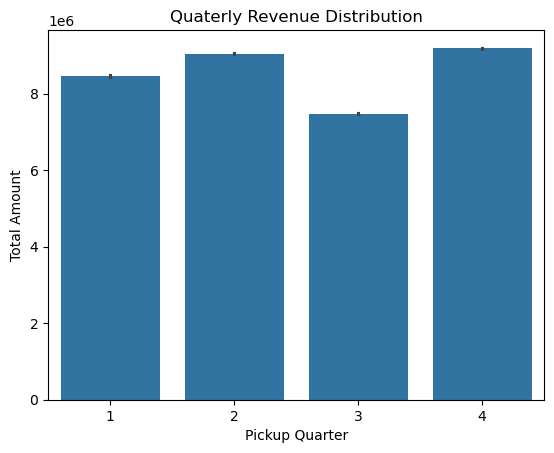

In [108]:
ax = sns.barplot(df_taxi, x = "pickup_quarter", y= "total_amount", estimator= "sum")
ax.set_xlabel("Pickup Quarter")
ax.set_ylabel("Total Amount")
ax.set_title("Quaterly Revenue Distribution")
plt.show()

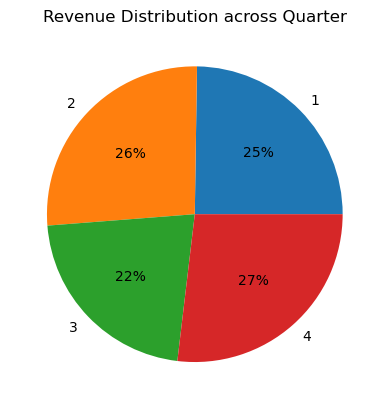

In [111]:
tmp = pd.DataFrame(df_taxi.groupby(by= "pickup_quarter")["total_amount"].sum()).reset_index()
plt.title("Revenue Distribution across Quarter")
plt.pie(tmp["total_amount"],labels=tmp["pickup_quarter"], autopct='%.0f%%')
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

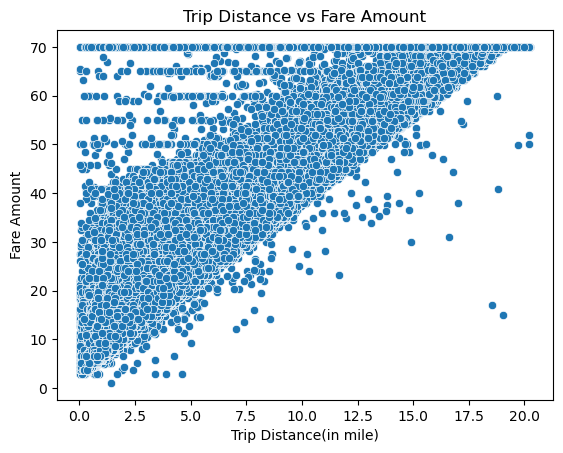

In [114]:
# Show how trip fare is affected by distance
ax = sns.scatterplot(df_taxi, x = "trip_distance", y = "fare_amount")
ax.set_xlabel("Trip Distance(in mile)")
ax.set_ylabel("Fare Amount")
ax.set_title("Trip Distance vs Fare Amount")
plt.show()

In [115]:
df_taxi["trip_distance"].corr(df_taxi["fare_amount"])

0.9547727429454412

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

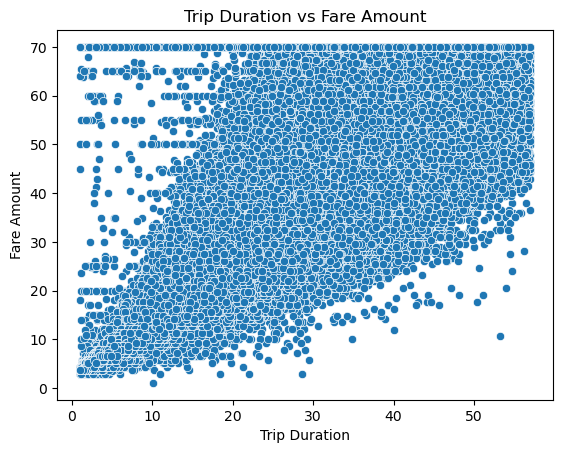

In [117]:
# Show relationship between fare and trip duration
ax = sns.scatterplot(df_taxi, x = "trip_duration", y = "fare_amount")
ax.set_xlabel("Trip Duration")
ax.set_ylabel("Fare Amount")
ax.set_title("Trip Duration vs Fare Amount")
plt.show()


In [119]:
df_taxi["trip_duration"].corr(df_taxi["fare_amount"])

0.8834592793095634

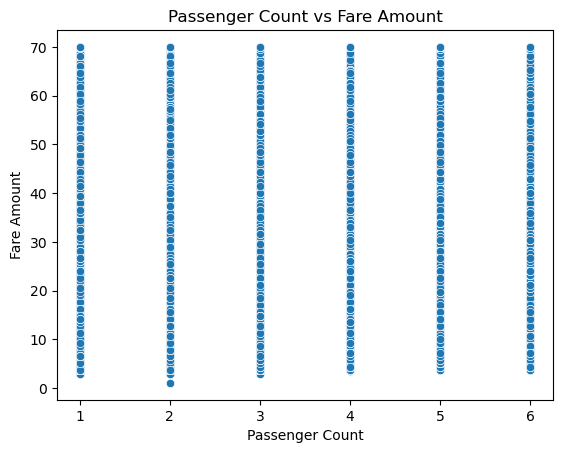

In [120]:
# Show relationship between fare and number of passengers
ax = sns.scatterplot(df_taxi, x = "passenger_count", y = "fare_amount")
ax.set_xlabel("Passenger Count")
ax.set_ylabel("Fare Amount")
ax.set_title("Passenger Count vs Fare Amount")
plt.show()

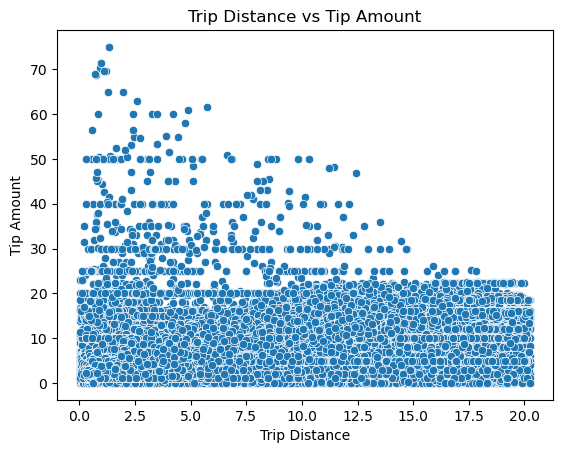

0.7665155872089688

In [121]:
# Show relationship between tip and trip distance
ax = sns.scatterplot(df_taxi, x = "trip_distance", y = "tip_amount")
ax.set_xlabel("Trip Distance")
ax.set_ylabel("Tip Amount")
ax.set_title("Trip Distance vs Tip Amount")
plt.show()
df_taxi["trip_distance"].corr(df_taxi["tip_amount"])



**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

payment_type
1    1314320
2         20
4         13
3          4
Name: count, dtype: int64


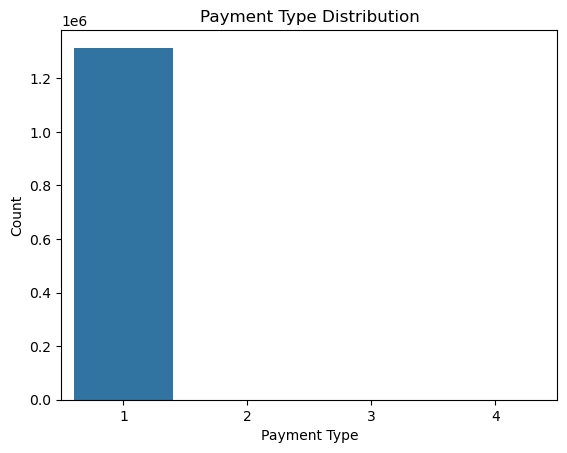

In [122]:
# Analyse the distribution of different payment types (payment_type).
print(df_taxi["payment_type"].value_counts())
ax = sns.countplot(df_taxi, x = "payment_type")
ax.set_xlabel("Payment Type")
ax.set_ylabel("Count")
ax.set_title("Payment Type Distribution")
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [123]:
pip install geopandas


Note: you may need to restart the kernel to use updated packages.


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [124]:
import geopandas as gpd

In [125]:
# Read the shapefile using geopandas
zones = gpd.read_file("/Users/sambitpani/Documents/Study/upgrad-AI&ML/Modules/M7 EDA Assignment/Starter Notebook - EDA NYC Taxi/taxi_zones/taxi_zones.shp")# read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


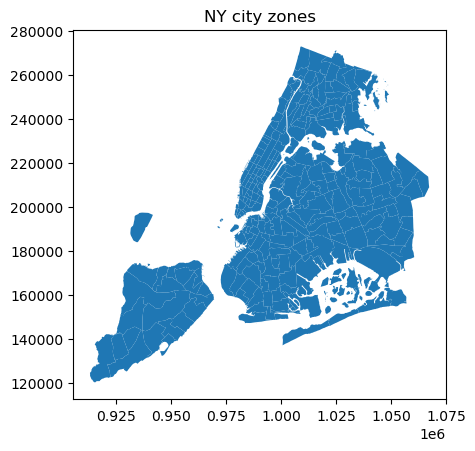

In [128]:
print(zones.info())
zones.plot()
plt.title("NY city zones")
plt.show()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [129]:
# Merge zones and trip records using locationID and PULocationID

df_taxi = df_taxi.merge( zones, how="left" , left_on= "PULocationID" , right_on= "LocationID")

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [ ]:
# Group data by location and calculate the number of trips

df_taxi_per_loc = pd.DataFrame(df_taxi.groupby(by= "PULocationID")["PULocationID"].count())
df_taxi_per_loc.columns = ["trips"]
df_taxi_per_loc

trips
PULocationID       
1                 4
4              1369
7               243
8                 2
9                 2
...             ...
261            6555
262           18801
263           27141
264           11445
265              53

[214 rows x 1 columns]

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [144]:
# Merge trip counts back to the zones GeoDataFrame

zones_trip = zones.merge(df_taxi_per_loc, how="left", left_on="LocationID", right_on="PULocationID")
zones_trip["trips"] = zones_trip["trips"].fillna(0)


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

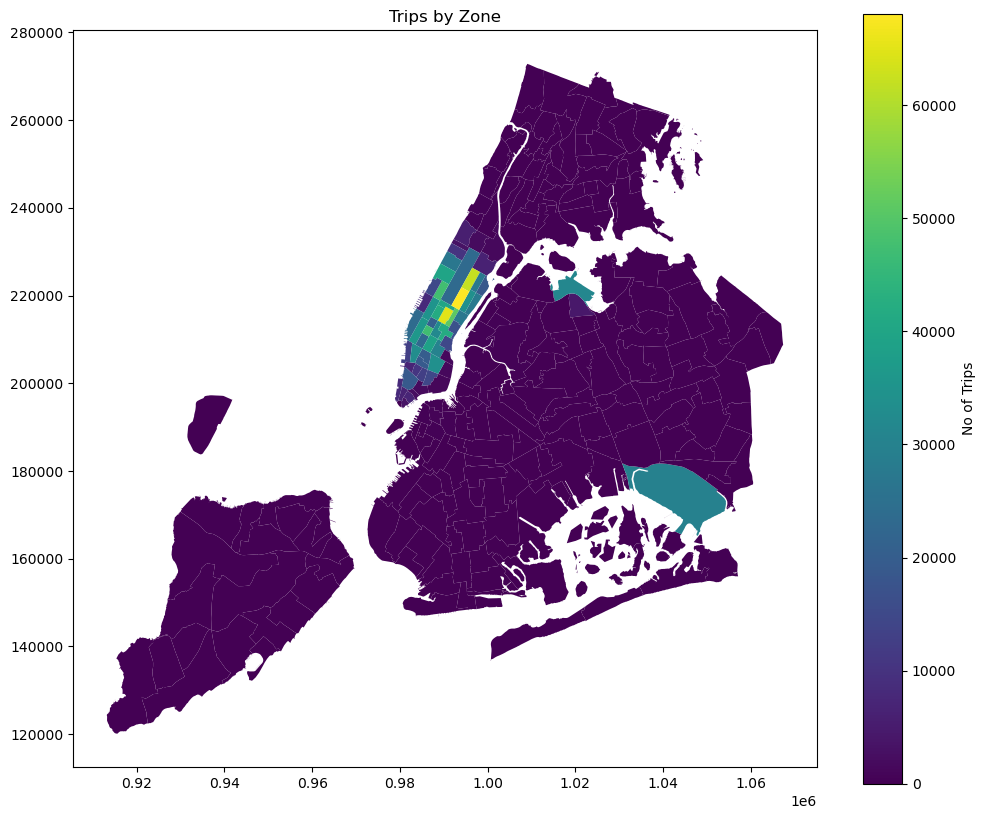

In [145]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12,10))

# Plot the map and display it
zones_trip.plot(column='trips', legend=True, ax=ax, legend_kwds={'label': "No of Trips", 'orientation': "vertical"})
ax.set_title("Trips by Zone")
plt.show()


In [ ]:
# can you try displaying the zones DF sorted by the number of trips?
zones_trip.sort_values("trips", ascending= False).head(20)

OBJECTID  Shape_Leng  Shape_Area                          zone  \
236       237    0.042213    0.000096         Upper East Side South   
160       161    0.035804    0.000072                Midtown Center   
235       236    0.044252    0.000103         Upper East Side North   
161       162    0.035270    0.000048                  Midtown East   
141       142    0.038176    0.000076           Lincoln Square East   
185       186    0.024696    0.000037  Penn Station/Madison Sq West   
169       170    0.045769    0.000074                   Murray Hill   
229       230    0.031028    0.000056     Times Sq/Theatre District   
162       163    0.034177    0.000041                 Midtown North   
238       239    0.063626    0.000205         Upper West Side South   
233       234    0.036072    0.000073                      Union Sq   
67         68    0.049337    0.000111                  East Chelsea   
47         48    0.043747    0.000094                  Clinton East   
78         79    0.042625    0.000108                  East Village   
140       141    0.041514    0.000077               Lenox Hill West   
248       249    0.036384    0.000072                  West Village   
163       164    0.035772    0.000056                 Midtown South   
137       138    0.107467    0.000537             LaGuardia Airport   
106       107    0.038041    0.000075                      Gramercy   
131       132    0.245479    0.002038                   JFK Airport   

     LocationID    borough                                           geometry  \
236         237  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   
160         161  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   
235         236  Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...   
161         162  Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...   
141         142  Manhattan  POLYGON ((989380.305 218980.247, 989359.803 21...   
185         186  Manhattan  POLYGON ((986752.603 210853.699, 986627.863 21...   
169         170  Manhattan  POLYGON ((991999.299 210994.739, 991972.635 21...   
229         230  Manhattan  POLYGON ((988786.877 214532.094, 988650.277 21...   
162         163  Manhattan  POLYGON ((989412.663 219020.943, 990045.841 21...   
238         239  Manhattan  POLYGON ((991168.979 226252.992, 991955.565 22...   
233         234  Manhattan  POLYGON ((987029.847 207022.299, 987048.27 206...   
67           68  Manhattan  POLYGON ((983690.405 209040.369, 983550.612 20...   
47           48  Manhattan  POLYGON ((986694.313 214463.846, 986568.184 21...   
78           79  Manhattan  POLYGON ((988746.067 202151.955, 988733.885 20...   
140         141  Manhattan  POLYGON ((994839.073 216123.698, 994786.74 216...   
248         249  Manhattan  POLYGON ((983555.319 204876.901, 983469.158 20...   
163         164  Manhattan  POLYGON ((988787.425 210315.593, 988662.868 21...   
137         138     Queens  MULTIPOLYGON (((1019904.219 225677.983, 102031...   
106         107  Manhattan  POLYGON ((989131.643 205749.904, 989084.531 20...   
131         132     Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...   

       trips  
236  68090.0  
160  65045.0  
235  62030.0  
161  50858.0  
141  47539.0  
185  47116.0  
169  41724.0  
229  41623.0  
162  40090.0  
238  39746.0  
233  39349.0  
67   36183.0  
47   35197.0  
78   33971.0  
140  33935.0  
248  33105.0  
163  32019.0  
137  31473.0  
106  30206.0  
131  29715.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [157]:
# Find routes which have the slowest speeds at different times of the day

#Find average trip_distance and trip_duration by pickup location, dropoff location and hour of the day
df_slow_route = df_taxi.groupby(by = ["PULocationID", "DOLocationID", "pickup_hour"])[["trip_distance", "trip_duration"]].median().reset_index()

# add column speed 
df_slow_route["speed"] = round(df_slow_route["trip_distance"]/df_slow_route["trip_duration"], 2)

# find min speed by hour of the day
df_minspeed_hour = pd.DataFrame(df_slow_route.groupby(by = "pickup_hour")["speed"].min()).reset_index()

#merge 2 dataframe on pickup_hour, speed and remove duplicates by pickup_hour
pd.merge(df_slow_route, df_minspeed_hour, on=['pickup_hour', 'speed'], how='inner').drop_duplicates("pickup_hour").sort_values("pickup_hour")


PULocationID  DOLocationID  pickup_hour  trip_distance  trip_duration  \
12           140           264            0          0.200          6.430   
27           262           263            1          0.090          1.570   
11           137            90            2          1.100         12.320   
8            100            68            3          0.750         13.360   
16           162           161            4          0.695         12.270   
3             43           162            5          1.100         15.930   
22           230           230            6          0.380          6.030   
29           264           140            7          1.050         16.730   
17           163           264            8          0.400          9.320   
2             40            52            9          0.250          5.930   
4             45            45           10          0.050         50.430   
19           193           193           11          0.010          4.000   
1             12           261           12          0.300          8.400   
13           148            45           13          0.380          9.320   
6             71            71           14          0.010          2.070   
0              4           148           15          0.420         16.550   
20           211           211           16          0.250         11.070   
28           264            45           17          0.190          6.680   
9            100           100           18          0.310          6.735   
14           158           217           19          0.230         26.320   
7             80            80           20          0.080          2.900   
26           261           209           21          0.580         13.080   
10           100           100           22          0.330          6.325   
25           260           129           23          1.305         26.950   

    speed  
12   0.03  
27   0.06  
11   0.09  
8    0.06  
16   0.06  
3    0.07  
22   0.06  
29   0.06  
17   0.04  
2    0.04  
4    0.00  
19   0.00  
1    0.04  
13   0.04  
6    0.00  
0    0.03  
20   0.02  
28   0.03  
9    0.05  
14   0.01  
7    0.03  
26   0.04  
10   0.05  
25   0.05

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [162]:
df_taxi["speed"] = df_taxi["trip_distance"]/df_taxi["trip_duration"]

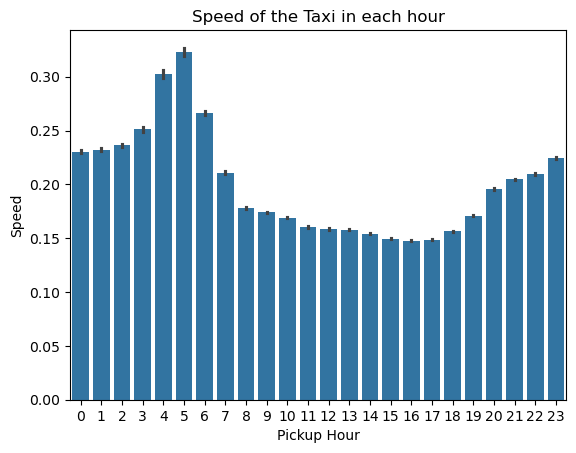

In [164]:
ax = sns.barplot(df_taxi, x = "pickup_hour", y = "speed", estimator= "mean")
ax.set_xlabel("Pickup Hour")
ax.set_ylabel("Speed")
ax.set_title("Speed of the Taxi in each hour")
plt.show()

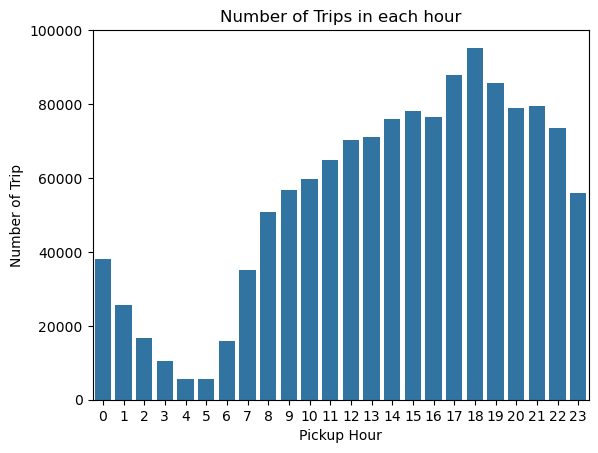

In [165]:
# Visualise the number of trips per hour and find the busiest hour
ax = sns.countplot(df_taxi, x = "pickup_hour")
ax.set_xlabel("Pickup Hour")
ax.set_ylabel("Number of Trip")
ax.set_title("Number of Trips in each hour")
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [175]:
# Scale up the number of trips
# Fill in the value of your sampling fraction and use that to scale up the numbers

slowest_hour = df_taxi.groupby(by = "pickup_hour")["speed"].mean().sort_values().head(5)
trips_per_hour = df_taxi["pickup_hour"].value_counts()
df_slowest_hour_trips = pd.merge(trips_per_hour, slowest_hour, on="pickup_hour")
df_slowest_hour_trips["count"] = df_slowest_hour_trips["count"] * 20
df_slowest_hour_trips

count     speed
pickup_hour                   
18           1905380  0.156275
17           1758700  0.148696
15           1560800  0.149406
16           1530560  0.147690
14           1521100  0.154028

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

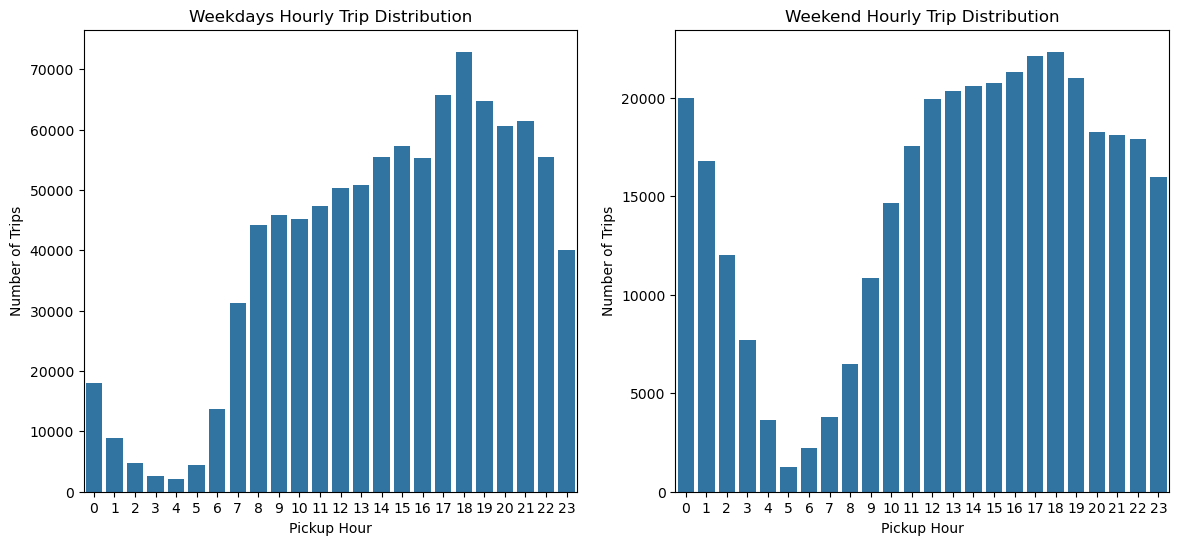

In [176]:
# Compare traffic trends for the week days and weekends

fig, ax =plt.subplots(1,2, figsize = (14,6))
df_weekday = df_taxi[df_taxi["pickup_weekday"].isin(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])]
ax1 = sns.countplot(df_weekday, x = "pickup_hour", ax=ax[0])
ax1.set_xlabel("Pickup Hour")
ax1.set_ylabel("Number of Trips")
ax1.set_title("Weekdays Hourly Trip Distribution")

df_weekend = df_taxi[df_taxi["pickup_weekday"].isin(["Saturday", "Sunday"])]
ax2 = sns.countplot(df_weekend, x = "pickup_hour", ax=ax[1])
ax2.set_xlabel("Pickup Hour")
ax2.set_ylabel("Number of Trips")
ax2.set_title("Weekend Hourly Trip Distribution")
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [ ]:
df_taxi = df_taxi.rename(columns={"zone":"pickup_zone", "borough":"pickup_borough"})
df_taxi = df_taxi.merge( zones[["zone", "LocationID", "borough"]], how="left" , left_on= "DOLocationID" , right_on= "LocationID")
df_taxi = df_taxi.rename(columns={"zone":"dropoff_zone", "borough":"dropoff_borough", "LocationID_x":"pickup_location_id", "LocationID_y":"dropoff_location_id"})

In [252]:
#create dataframe which has zone and its pickup counts
df_pulocation_count = pd.DataFrame(df_taxi.groupby(by=["PULocationID", "pickup_zone"])["PULocationID"].count()) # 265, 265 zoneid doesn't exists
df_pulocation_count.columns = ["pickups_count"]
df_pulocation_count.reset_index(1, inplace=True)
df_pulocation_count.index.name = "LocationID"

#create dataframe which has zone and its dropoff counts
df_dolocation_count = pd.DataFrame(df_taxi.groupby(by=["DOLocationID", "dropoff_zone"])["DOLocationID"].count()) 
df_dolocation_count.columns = ["dropoff_count"]
df_dolocation_count.reset_index(1, inplace=True)
df_dolocation_count.index.name = "LocationID"


#merge the above 2 dataframe and impute NA fields. Drop one zone column and rename a column to zone
df_zone_count = df_pulocation_count.merge(df_dolocation_count, how = "outer", left_index= True, right_index= True)
df_zone_count["pickups_count"].fillna(0, inplace= True)
df_zone_count["dropoff_count"].fillna(0, inplace= True)
df_zone_count["pickup_zone"].fillna(df_zone_count["dropoff_zone"], inplace= True)
df_zone_count.drop(columns= ["dropoff_zone"], inplace= True)
df_zone_count.rename(columns= {"pickup_zone":"zone"}, inplace= True)
df_zone_count

print("Top 10 Pickup Location")
print(df_zone_count.sort_values(by = "pickups_count", ascending= False).head(n = 10))

print("Top 10 Drop off Location")
print(df_zone_count.sort_values(by = "dropoff_count", ascending= False).head(n = 10))

Top 10 Pickup Location
                                    zone  pickups_count  dropoff_count
LocationID                                                            
237                Upper East Side South        68091.0        60590.0
161                       Midtown Center        65048.0        52255.0
236                Upper East Side North        62030.0        65242.0
162                         Midtown East        50860.0        39138.0
142                  Lincoln Square East        47539.0        39743.0
186         Penn Station/Madison Sq West        47120.0        28137.0
170                          Murray Hill        41725.0        41102.0
230            Times Sq/Theatre District        41623.0        34889.0
163                        Midtown North        40091.0        32699.0
239                Upper West Side South        39747.0        40450.0
Top 10 Drop off Location
                                 zone  pickups_count  dropoff_count
LocationID                      

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [255]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

df_zone_count["pu_do_ratio"] = df_zone_count["pickups_count"]/df_zone_count["dropoff_count"]
# 10 lowest (pickup/drop) ratios
print("10 lowest (pickup/drop) ratios")
print(df_zone_count[["zone","pu_do_ratio"]].sort_values(by="pu_do_ratio", ascending= True).head(10))

# 10 highest (pickup/drop) ratios
print("10 highest (pickup/drop) ratios")
print(df_zone_count[["zone","pu_do_ratio"]].sort_values(by="pu_do_ratio", ascending= False).head(10))

10 lowest (pickup/drop) ratios
                                   zone  pu_do_ratio
LocationID                                          
32                            Bronxdale          0.0
201                       Rockaway Park          0.0
30                        Broad Channel          0.0
205                        Saint Albans          0.0
139                           Laurelton          0.0
210                      Sheepshead Bay          0.0
214            South Beach/Dongan Hills          0.0
122                              Hollis          0.0
118         Heartland Village/Todt Hill          0.0
117                     Hammels/Arverne          0.0
10 highest (pickup/drop) ratios
                                        zone  pu_do_ratio
LocationID                                               
199                            Rikers Island          inf
70                             East Elmhurst    11.715054
132                              JFK Airport     4.741118
207        

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [ ]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
df_night_trip = df_taxi[(df_taxi["pickup_hour"] >= 23) | (df_taxi["pickup_hour"] <=5)]

print("High pickup zone during night hour")
print(df_night_trip["pickup_zone"].value_counts(ascending= False).head(10))

print("--------------- \n")
print("High dropoff zone during night hour")
print(df_night_trip["dropoff_zone"].value_counts(ascending= False).head(10))


High pickup zone during night hour
pickup_zone
East Village                    12623
West Village                    10292
Lower East Side                  7898
Clinton East                     7897
Greenwich Village South          7150
JFK Airport                      5972
Times Sq/Theatre District        5674
Penn Station/Madison Sq West     5252
Midtown South                    4686
East Chelsea                     4585
Name: count, dtype: int64
--------------- 

High dropoff zone during night hour
dropoff_zone
East Village                     6562
Clinton East                     4941
Murray Hill                      4893
Gramercy                         4704
Lenox Hill West                  4386
East Chelsea                     4350
Yorkville West                   4108
West Village                     4010
Sutton Place/Turtle Bay North    3557
Upper East Side North            3532
Name: count, dtype: int64


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [264]:
# Filter for night hours (11 PM to 5 AM)

total_revenue = df_taxi["total_amount"].sum()
total_revenue_night_trip = df_night_trip["total_amount"].sum()
night_trip_share = total_revenue_night_trip / total_revenue
print("Night Trip Revenue share percentage " , round(night_trip_share,2) * 100)

Night Trip Revenue share percentage  13.0


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [265]:
df_taxi["fare_per_mile"] = df_taxi["fare_amount"]/df_taxi["trip_distance"]


In [279]:
df_taxi["fare_per_mile_passenger"] = round(df_taxi["fare_per_mile"]/df_taxi["passenger_count"],2)

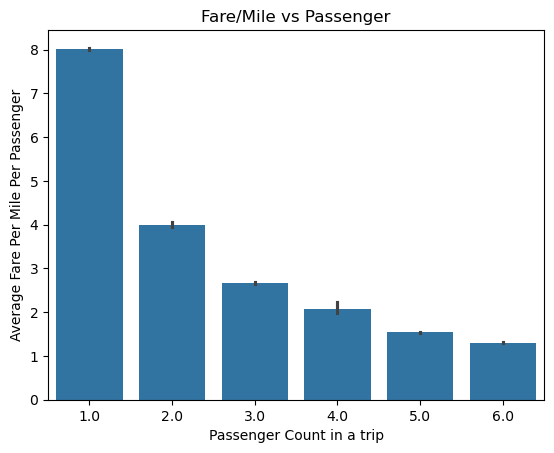

In [280]:
# Analyse the fare per mile per passenger for different passenger counts
ax = sns.barplot(data = df_taxi, x = "passenger_count", y = "fare_per_mile_passenger", estimator= "mean")
ax.set_xlabel("Passenger Count in a trip")
ax.set_ylabel("Average Fare Per Mile Per Passenger")
ax.set_title("Fare/Mile vs Passenger")
plt.show()

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

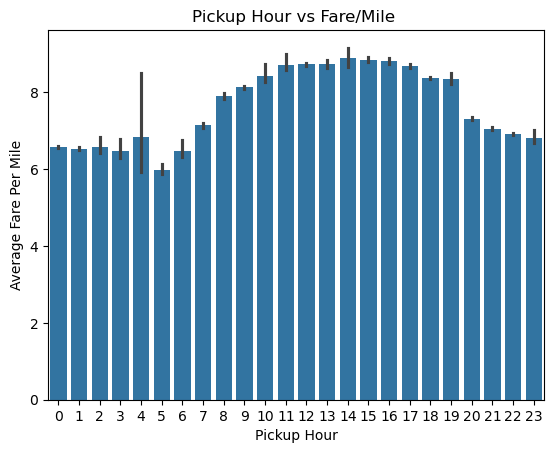

In [281]:
ax = sns.barplot(df_taxi, x = "pickup_hour", y = "fare_per_mile", estimator= "mean")
ax.set_xlabel("Pickup Hour")
ax.set_ylabel("Average Fare Per Mile")
ax.set_title("Pickup Hour vs Fare/Mile ")
plt.show()

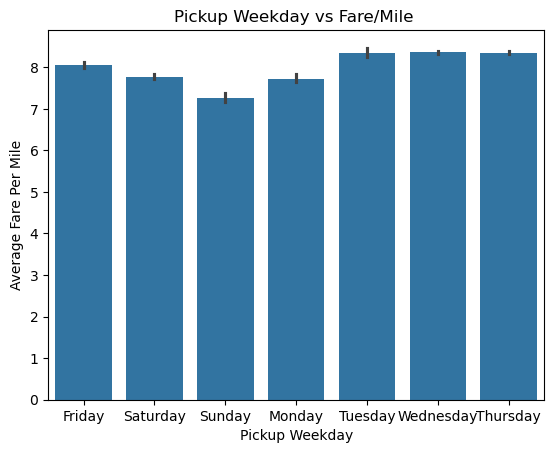

In [282]:
ax = sns.barplot(df_taxi, x = "pickup_weekday", y = "fare_per_mile", estimator= "mean")
ax.set_xlabel("Pickup Weekday")
ax.set_ylabel("Average Fare Per Mile")
ax.set_title("Pickup Weekday vs Fare/Mile ")
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

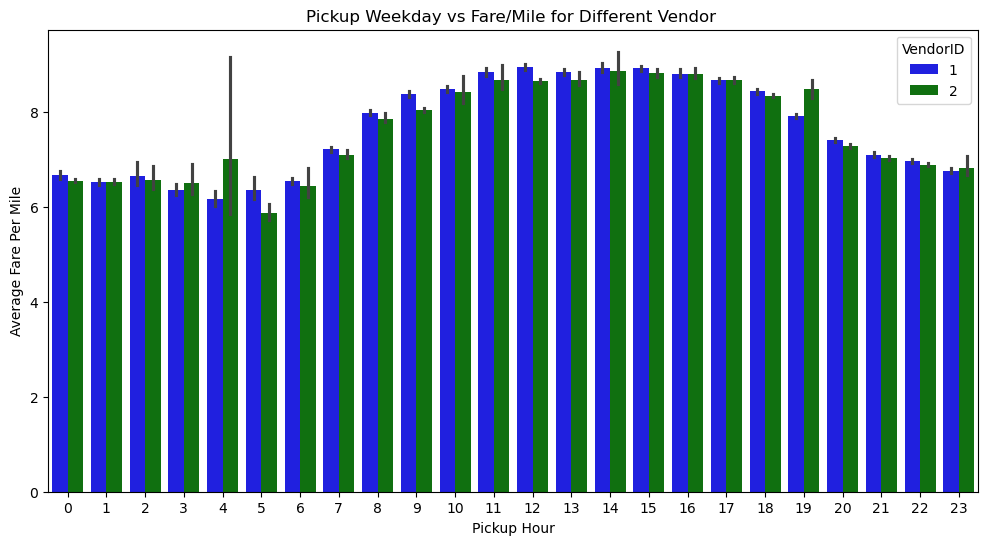

In [283]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
sns.barplot(df_taxi, x = "pickup_hour", y = "fare_per_mile", estimator= "mean", hue="VendorID", palette=['blue', 'green'], ax= ax)
ax.set_xlabel("Pickup Hour")
ax.set_ylabel("Average Fare Per Mile")
ax.set_title("Pickup Weekday vs Fare/Mile for Different Vendor ")
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [284]:
df_taxi["trip_distance_group"] = df_taxi["trip_distance"].apply(lambda x : '0-2' if x <=2 else '2-5' if x <=5 else 'more than 5')

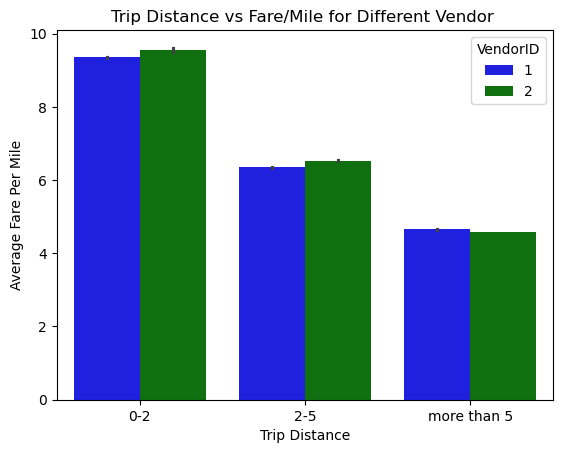

In [285]:
ax = sns.barplot(data= df_taxi, x = "trip_distance_group", y="fare_per_mile",estimator= "mean", hue="VendorID", palette=['blue', 'green'])
ax.set_xlabel("Trip Distance")
ax.set_ylabel("Average Fare Per Mile")
ax.set_title("Trip Distance vs Fare/Mile for Different Vendor ")
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [289]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

df_taxi["tip_percentage"] = round(100 * df_taxi["tip_amount"]/df_taxi["total_amount"], 2)

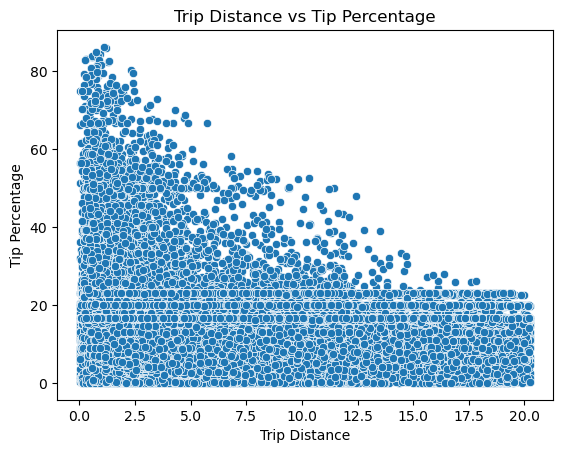

In [291]:
ax = sns.scatterplot(data= df_taxi, x = "trip_distance", y = "tip_percentage")
ax.set_xlabel("Trip Distance")
ax.set_ylabel("Tip Percentage")
ax.set_title("Trip Distance vs Tip Percentage")
plt.show()

In [292]:
df_taxi["trip_distance"].corr(df_taxi["tip_percentage"])

-0.06698272648099038

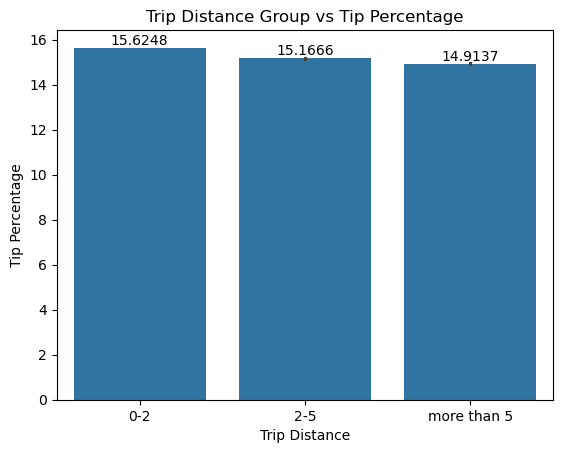

In [294]:
ax = sns.barplot(data= df_taxi, x = "trip_distance_group", y = "tip_percentage")
ax.set_xlabel("Trip Distance")
ax.set_ylabel("Tip Percentage")
ax.set_title("Trip Distance Group vs Tip Percentage")
ax.bar_label(ax.containers[0], fontsize=10);
plt.show()

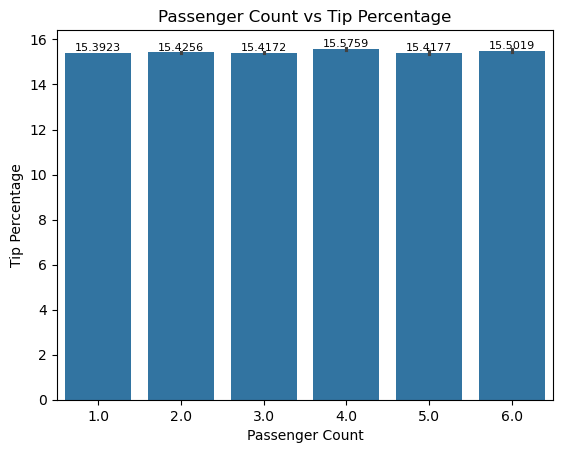

In [295]:
ax = sns.barplot(data= df_taxi, x = "passenger_count", y = "tip_percentage")
ax.set_xlabel("Passenger Count")
ax.set_ylabel("Tip Percentage")
ax.set_title("Passenger Count vs Tip Percentage")
ax.bar_label(ax.containers[0], fontsize=8);
plt.show()

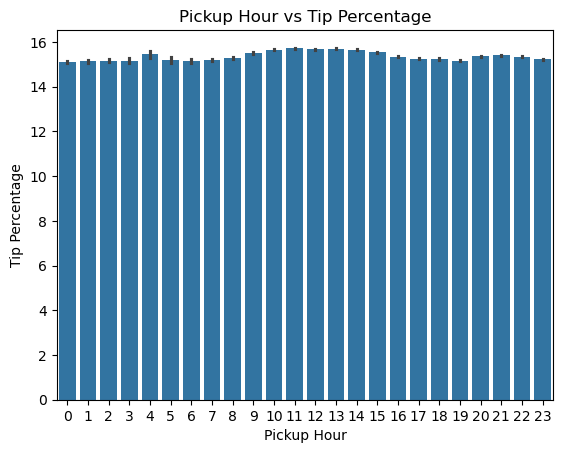

In [296]:
ax = sns.barplot(data= df_taxi, x = "pickup_hour", y = "tip_percentage")
ax.set_xlabel("Pickup Hour")
ax.set_ylabel("Tip Percentage")
ax.set_title("Pickup Hour vs Tip Percentage")
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

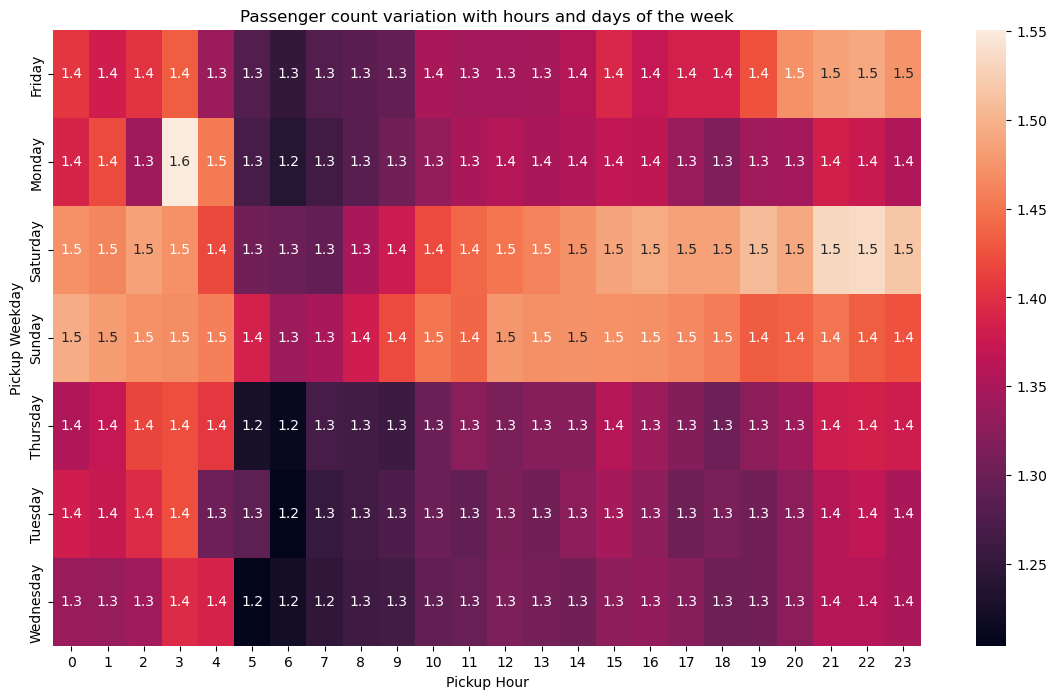

In [300]:
#fig, ax = plt.subplots(1, 1, figsize=(12,6))
plt.figure(figsize = (14,8))
plt.title('Passenger count variation with hours and days of the week')
res = pd.pivot_table(data=df_taxi, index = "pickup_weekday", columns="pickup_hour", values="passenger_count", aggfunc="mean")
ax1 = sns.heatmap(res, annot=True)
plt.xlabel("Pickup Hour")
plt.ylabel("Pickup Weekday")
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [304]:
df_geo = gpd.GeoDataFrame(df_taxi, geometry="geometry")

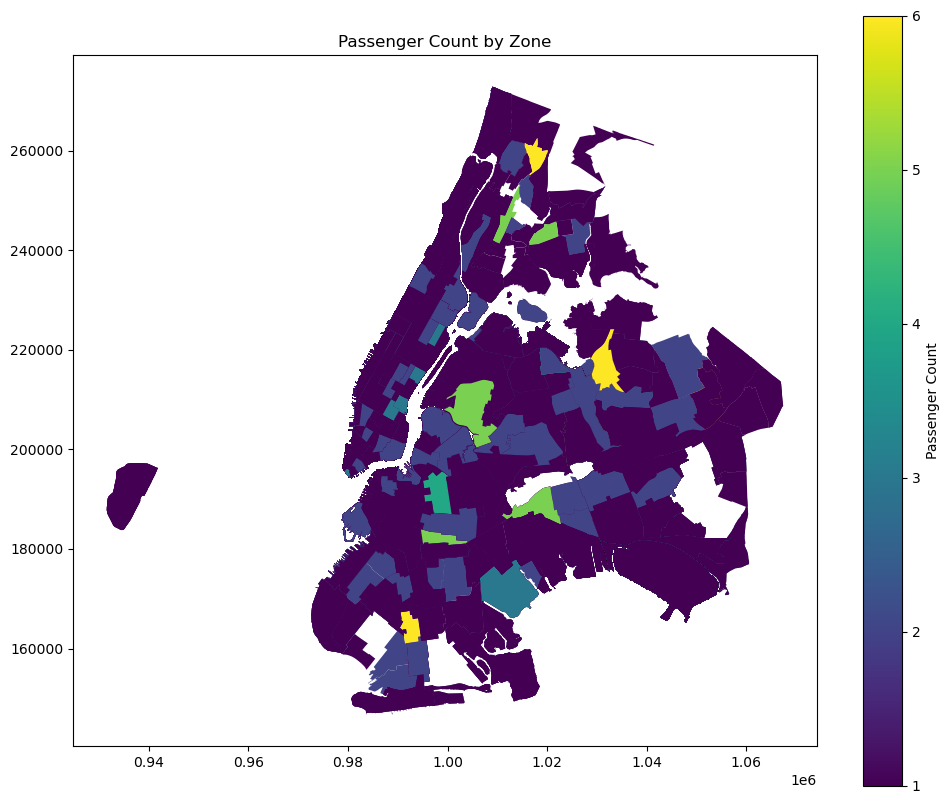

In [316]:
# How does passenger count vary across zones
fig, ax = plt.subplots(1, 1, figsize=(12,10))

# Plot the map and display it
df_geo.plot(column='passenger_count', legend=True, ax=ax, legend_kwds={'label': "Passenger Count", 'orientation': "vertical"})
ax.set_title("Passenger Count by Zone")
plt.show()

In [314]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

df_3_passenger = pd.DataFrame(df_taxi.groupby(by= "PULocationID" )["passenger_count"].mean())
df_3_passenger.columns = ["avg_passenger"]
df_3_passenger["avg_passenger"] = round(df_3_passenger["avg_passenger"], 2)

zones_trip_passenger = zones_trip.merge(df_3_passenger, how="left", left_on="LocationID", right_on="PULocationID")
zones_trip_passenger["avg_passenger"].fillna(0, inplace= True)
zones_trip_passenger


OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0           1    0.116357    0.000782           Newark Airport           1   
1           2    0.433470    0.004866              Jamaica Bay           2   
2           3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3           4    0.043567    0.000112            Alphabet City           4   
4           5    0.092146    0.000498            Arden Heights           5   
..        ...         ...         ...                      ...         ...   
258       259    0.126750    0.000395       Woodlawn/Wakefield         259   
259       260    0.133514    0.000422                 Woodside         260   
260       261    0.027120    0.000034       World Trade Center         261   
261       262    0.049064    0.000122           Yorkville East         262   
262       263    0.037017    0.000066           Yorkville West         263   

           borough                                           geometry  \
0              EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1           Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2            Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3        Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4    Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   
..             ...                                                ...   
258          Bronx  POLYGON ((1025414.782 270986.139, 1025138.624 ...   
259         Queens  POLYGON ((1011466.966 216463.005, 1011545.889 ...   
260      Manhattan  POLYGON ((980555.204 196138.486, 980570.792 19...   
261      Manhattan  MULTIPOLYGON (((999804.795 224498.527, 999824....   
262      Manhattan  POLYGON ((997493.323 220912.386, 997355.264 22...   

       trips  avg_passenger  
0        4.0           1.00  
1        0.0           0.00  
2        0.0           0.00  
3     1369.0           1.45  
4        0.0           0.00  
..       ...            ...  
258      0.0           0.00  
259     70.0           1.36  
260   6555.0           1.49  
261  18801.0           1.34  
262  27141.0           1.35  

[263 rows x 9 columns]

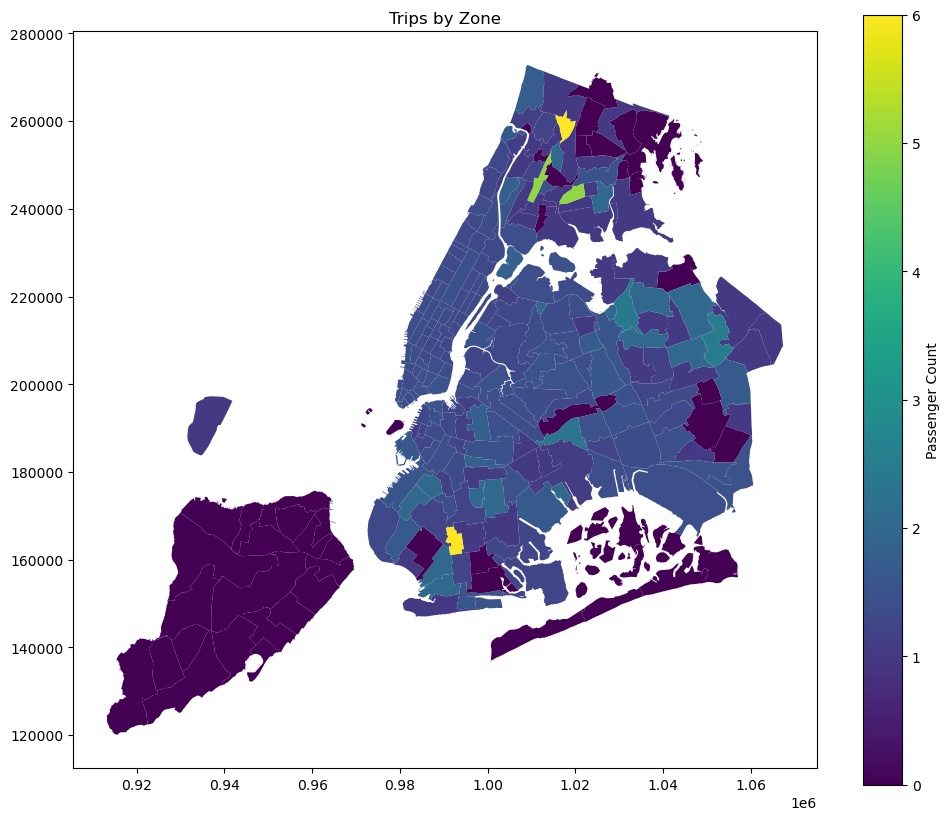

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12,10))

# Plot the map and display it
zones_trip_passenger.plot(column='avg_passenger', legend=True, ax=ax, legend_kwds={'label': "Passenger Count", 'orientation': "vertical"})
ax.set_title("Average Passenger by Zone")
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

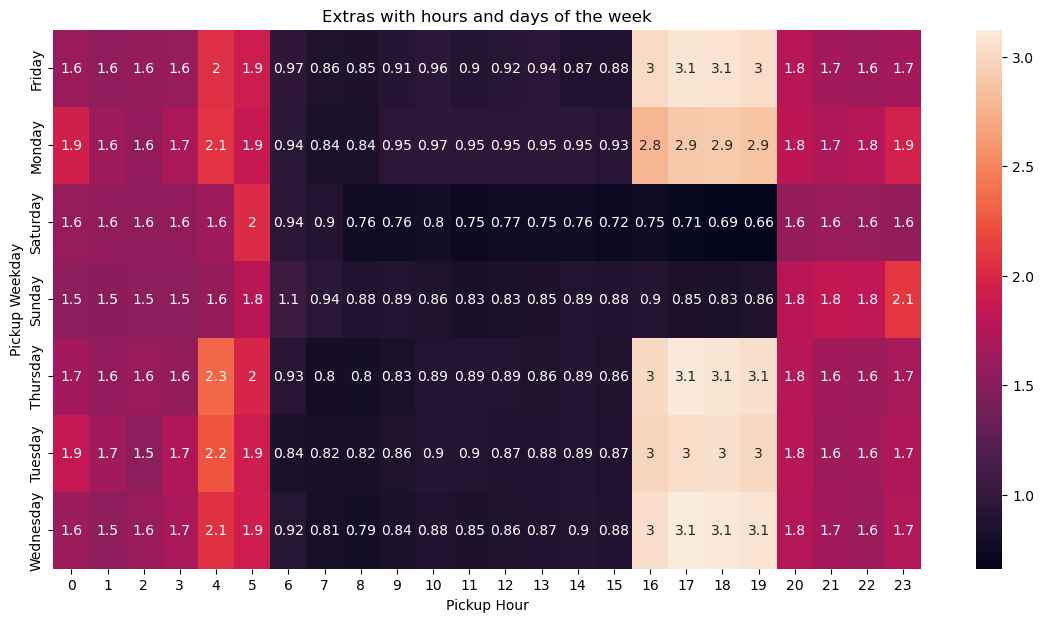

In [321]:
# How often is each surcharge applied?

#print(df_3["extra"].value_counts())
plt.figure(figsize = (14,7))
plt.title('Extras with hours and days of the week')
res = pd.pivot_table(data=df_taxi, index = "pickup_weekday", columns="pickup_hour", values="extra", aggfunc="mean")
ax1 = sns.heatmap(res, annot=True)
plt.xlabel("Pickup Hour")
plt.ylabel("Pickup Weekday")
plt.show()


congestion_surcharge
2.5    1265193
0.0      49288
Name: count, dtype: int64


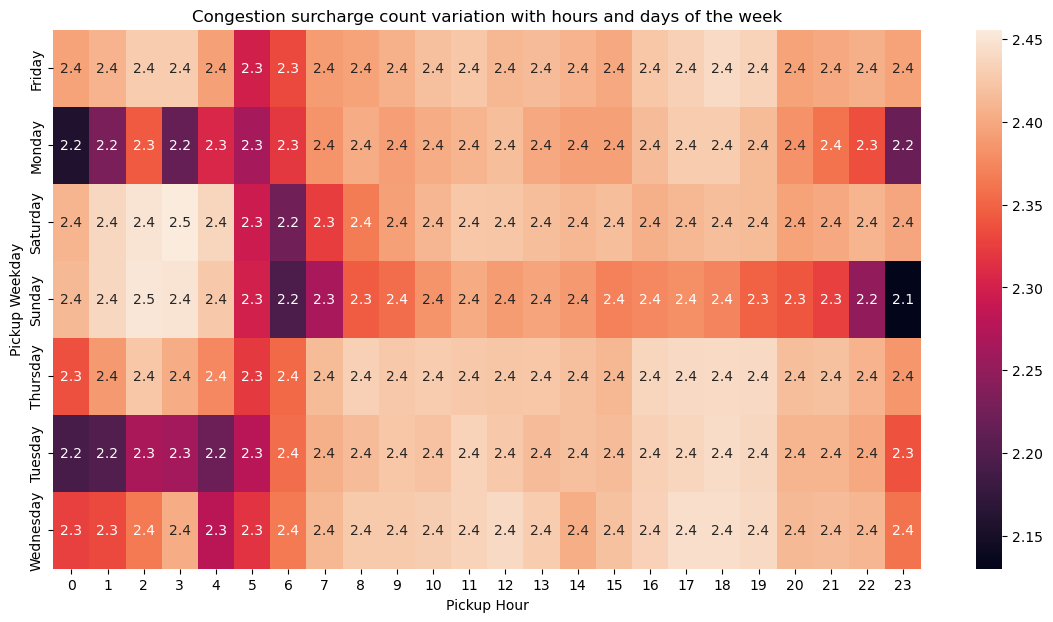

In [322]:
print(df_taxi["congestion_surcharge"].value_counts())
plt.figure(figsize = (14,7))
plt.title('Congestion surcharge count variation with hours and days of the week')
res = pd.pivot_table(data=df_taxi, index = "pickup_weekday", columns="pickup_hour", values="congestion_surcharge", aggfunc="mean")
ax1 = sns.heatmap(res, annot=True)
plt.xlabel("Pickup Hour")
plt.ylabel("Pickup Weekday")
plt.show()


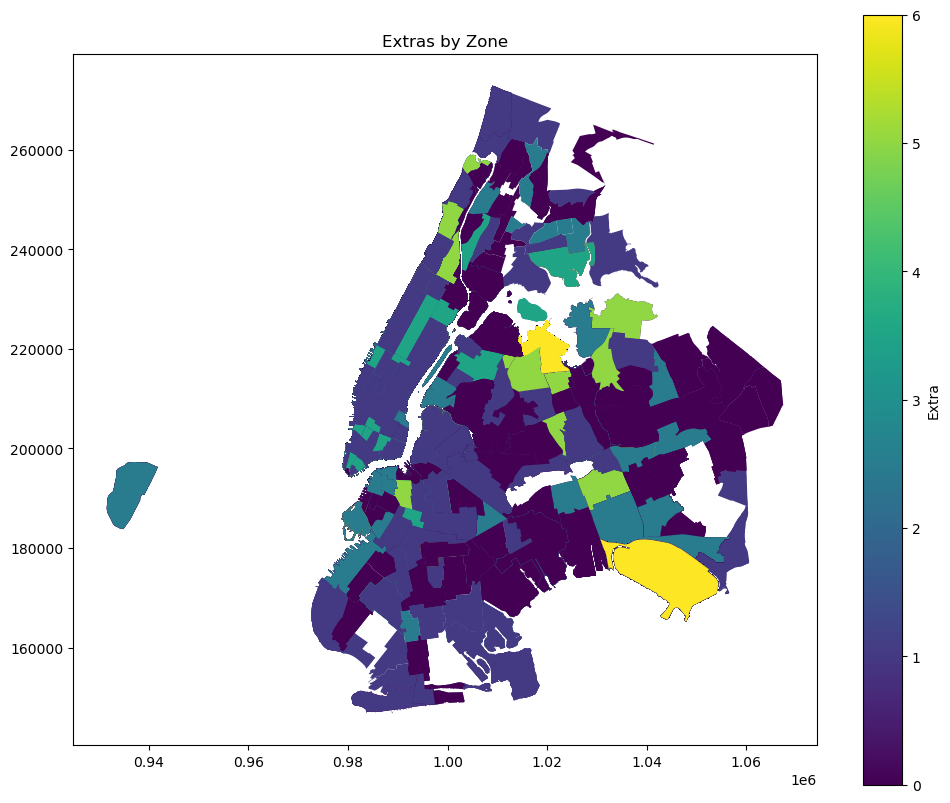

In [319]:
fig, ax = plt.subplots(1, 1, figsize=(12,10))

# Plot the map and display it
df_geo.plot(column='extra', legend=True, ax=ax, legend_kwds={'label': "Extra", 'orientation': "vertical"})
ax.set_title("Extras by Zone")
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

Increase the number of taxis during the peak time from 17-19 hours. And reduce the
taxis during the early morning when the demand is low.
●
Put more taxis on the high demand route which is mostly in the Manhattan region.
●
More taxi should be placed during the weekend night time in compare to the weekdays
night time

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

Put more taxi on the high demand route which is mostly in the Manhattan region.
More taxi should be placed during the weekend night time in compare to the weekdays night time
More taxis should be placed during 17-19 hours of the day. 
More taxis should be added in the month of May and last 3 months of the year.
Put more taxis in the airport regions too.
 


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.


##### As fare per mile per passenger is more when the number of passengers is less, taxis should be more focused in the zone where the passenger count is less.
